In [1]:
import pandas as pd
inputs = "7"

df=pd.read_csv('csvs/' + inputs + 'lynx_train_X.csv', sep=' ',header=None)
new_train_X = df.values
df=pd.read_csv('csvs/' + inputs + 'lynx_train_Y.csv', sep=' ',header=None)
new_train_Y = df.values

X_train_inputs = []
Y_train_outputs = []

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# L = len(new_train_X)
L = len(new_train_X)
for i in range(L):
    X_train_inputs.append(tuple(new_train_X[i]))
for i in range(L):
    Y_train_outputs.append(tuple(new_train_Y[i]))

In [2]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import neat

# 2-input XOR inputs and expected outputs.
xor_inputs = X_train_inputs
xor_outputs = Y_train_outputs


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 0.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        if_no_connect = True
        
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2
            if float(output[0]) != 0:
                if_no_connect = False
        
        if (if_no_connect == False):
            genome.fitness /= len(xor_inputs)
        else:
            genome.fitness = -1

In [26]:
x_inputs = X_train_inputs
x_outputs = Y_train_outputs

def ad_fit(x):
    ad_fit = np.exp(x**2)**10*(x**2)
    #ad_fit = (x**2)
    return ad_fit

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        error = 0.0
        if_no_connect = True
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(x_inputs, x_outputs):
            output = net.activate(xi)
            e = ad_fit(output[0] - xo[0])
            if e >= 100:
                e = 100
            error -= e
            # error -= np.abs(output[0] - xo[0])
            if float(output[0]) != 0:
                if_no_connect = False

        if if_no_connect:
            mse = -1
        else:
            mse = error/len(x_inputs)
        # mad = error/L
        genome.fitness = mse

In [30]:
# Load configuration.
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "config-feedforward",
)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(False))

# Run until a solution is found.
winner = p.run(eval_genomes, 500)

# Display the winning genome.
print("\nBest genome:\n{!s}".format(winner))

# Show output of the most fit genome against training data.
print("\nOutput:")
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
for xi, xo in zip(xor_inputs, xor_outputs):
    output = winner_net.activate(xi)
    #print("  input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))


 ****** Running generation 0 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 8) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.463, standard deviation 0.474
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.077 sec

 ****** Running generation 1 ****** 

Population's average fitness: -2.16252 stdev: 5.62072
Best fitness: -1.00000 - size: (1, 8) - species 1 - id 1
Average adjusted fitness: 0.971
Mean genetic distance 1.571, standard deviation 0.564
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.094 sec (0.086 average)

 ****** Running generation 2 ****** 

Population's average fitness: -2.22840 stdev: 5.35019
Best fitness: -1.00000 - size: (1, 8) - species 1 - id 1
Average adjusted fitness: 0.968
Mean genetic distance 1.680, standard deviation 0.456
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.095 sec (0.089 average)

Population's average fitness: -1.73792 stdev: 7.02270
Best fitness: -1.00000 - size: (1, 8) - species 1 - id 1
Average adjusted fitness: 0.989
Mean genetic distance 2.176, standard deviation 0.621
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.119 sec (0.115 average)

 ****** Running generation 25 ****** 

Population's average fitness: -2.79420 stdev: 11.76167
Best fitness: -1.00000 - size: (1, 8) - species 1 - id 1
Average adjusted fitness: 0.981
Mean genetic distance 2.193, standard deviation 0.604
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.169 sec (0.121 average)

 ****** Running generation 26 ****** 

Population's average fitness: -4.80930 stdev: 15.85421
Best fitness: -1.00000 - size: (1, 8) - species 1 - id 1
Average adjusted fitness: 0.959
Mean genetic distance 2.244, standard deviation 0.705
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.165 sec (0.128 average)

 ****** Running g

Population's average fitness: -3.96916 stdev: 14.89451
Best fitness: -1.00000 - size: (1, 4) - species 3 - id 3866
Average adjusted fitness: 0.967
Mean genetic distance 2.119, standard deviation 0.466
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.373 sec (0.221 average)

 ****** Running generation 49 ****** 

Population's average fitness: -4.81207 stdev: 18.28118
Best fitness: -1.00000 - size: (1, 4) - species 3 - id 3866
Average adjusted fitness: 0.965
Mean genetic distance 2.129, standard deviation 0.428
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.234 sec (0.222 average)

 ****** Running generation 50 ****** 

Population's average fitness: -3.48183 stdev: 14.03626
Best fitness: -1.00000 - size: (1, 4) - species 3 - id 3866
Average adjusted fitness: 0.971
Mean genetic distance 2.145, standard deviation 0.584
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.198 sec (0.226 average)

 ******

Population's average fitness: -7.55572 stdev: 20.79990
Best fitness: -0.26427 - size: (3, 4) - species 4 - id 6851
Average adjusted fitness: 0.927
Mean genetic distance 2.269, standard deviation 0.588
Population of 99 members in 3 species
Total extinctions: 0
Generation time: 0.233 sec (0.208 average)

 ****** Running generation 74 ****** 

Population's average fitness: -7.44369 stdev: 19.07033
Best fitness: -0.26427 - size: (3, 4) - species 4 - id 6851
Average adjusted fitness: 0.932
Mean genetic distance 2.212, standard deviation 0.608
Population of 99 members in 3 species
Total extinctions: 0
Generation time: 0.143 sec (0.188 average)

 ****** Running generation 75 ****** 

Population's average fitness: -7.02197 stdev: 21.35184
Best fitness: -0.26427 - size: (3, 4) - species 4 - id 6851
Average adjusted fitness: 0.935
Mean genetic distance 2.320, standard deviation 0.592
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.149 sec (0.181 average)

 ****** R

Population's average fitness: -4.94927 stdev: 15.63350
Best fitness: -0.26427 - size: (3, 4) - species 6 - id 6851
Average adjusted fitness: 0.952
Mean genetic distance 2.387, standard deviation 0.756
Population of 101 members in 4 species
Total extinctions: 0
Generation time: 0.125 sec (0.130 average)

 ****** Running generation 98 ****** 

Population's average fitness: -5.13371 stdev: 14.94964
Best fitness: -0.26427 - size: (3, 4) - species 6 - id 6851
Average adjusted fitness: 0.935
Mean genetic distance 2.399, standard deviation 0.718
Population of 101 members in 4 species
Total extinctions: 0
Generation time: 0.125 sec (0.125 average)

 ****** Running generation 99 ****** 

Population's average fitness: -7.77708 stdev: 22.14168
Best fitness: -0.26427 - size: (3, 4) - species 6 - id 6851
Average adjusted fitness: 0.912
Mean genetic distance 2.452, standard deviation 0.816
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.132 sec (0.126 average)

 ******


Population's average fitness: -5.63703 stdev: 15.84194
Best fitness: -0.21665 - size: (3, 4) - species 6 - id 9864
Average adjusted fitness: 0.921
Mean genetic distance 2.513, standard deviation 0.724
Population of 99 members in 4 species
Total extinctions: 0
Generation time: 0.137 sec (0.124 average)

 ****** Running generation 122 ****** 

Population's average fitness: -8.78129 stdev: 19.90100
Best fitness: -0.21665 - size: (3, 4) - species 6 - id 9864
Average adjusted fitness: 0.879
Mean genetic distance 2.478, standard deviation 0.728
Population of 100 members in 4 species
Total extinctions: 0
Generation time: 0.130 sec (0.124 average)

 ****** Running generation 123 ****** 

Population's average fitness: -5.96870 stdev: 17.46578
Best fitness: -0.21665 - size: (3, 4) - species 6 - id 9864
Average adjusted fitness: 0.933
Mean genetic distance 2.420, standard deviation 0.697
Population of 100 members in 4 species
Total extinctions: 0
Generation time: 0.119 sec (0.123 average)

 ****

Population's average fitness: -7.16091 stdev: 20.04648
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.925
Mean genetic distance 2.602, standard deviation 0.767
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.132 sec (0.147 average)

 ****** Running generation 146 ****** 

Population's average fitness: -6.96816 stdev: 18.94342
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.931
Mean genetic distance 2.576, standard deviation 0.799
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.130 sec (0.146 average)

 ****** Running generation 147 ****** 

Population's average fitness: -6.00218 stdev: 16.68664
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.886
Mean genetic distance 2.231, standard deviation 0.753
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.132 sec (0.145 average)



Population's average fitness: -6.41647 stdev: 19.25615
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.936
Mean genetic distance 2.570, standard deviation 0.702
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.137 sec (0.143 average)

 ****** Running generation 171 ****** 

Population's average fitness: -3.48054 stdev: 11.73949
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.953
Mean genetic distance 2.629, standard deviation 0.683
Population of 99 members in 3 species
Total extinctions: 0
Generation time: 0.129 sec (0.141 average)

 ****** Running generation 172 ****** 

Population's average fitness: -2.91270 stdev: 9.05471
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.957
Mean genetic distance 2.602, standard deviation 0.712
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.152 sec (0.142 average)



Population's average fitness: -3.02077 stdev: 9.77443
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.960
Mean genetic distance 1.550, standard deviation 0.349
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.177 sec (0.138 average)

 ****** Running generation 196 ****** 

Population's average fitness: -5.83846 stdev: 18.91108
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.943
Mean genetic distance 1.707, standard deviation 0.364
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.141 sec (0.139 average)

 ****** Running generation 197 ****** 

Population's average fitness: -5.94001 stdev: 17.86937
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.942
Mean genetic distance 1.722, standard deviation 0.358
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.149 sec (0.140 average)



Population's average fitness: -5.78954 stdev: 18.00367
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.943
Mean genetic distance 2.394, standard deviation 0.758
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.154 sec (0.160 average)

 ****** Running generation 221 ****** 

Population's average fitness: -3.22469 stdev: 12.55649
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.967
Mean genetic distance 2.413, standard deviation 0.752
Population of 101 members in 3 species
Total extinctions: 0
Generation time: 0.149 sec (0.158 average)

 ****** Running generation 222 ****** 

Population's average fitness: -4.51354 stdev: 15.62806
Best fitness: -0.12025 - size: (4, 11) - species 8 - id 12989
Average adjusted fitness: 0.954
Mean genetic distance 2.402, standard deviation 0.780
Population of 101 members in 3 species
Total extinctions: 0
Generation time: 0.142 sec (0.157 average)


Generation time: 0.145 sec (0.152 average)

 ****** Running generation 244 ****** 

Population's average fitness: -4.91938 stdev: 17.25125
Best fitness: -0.10053 - size: (5, 11) - species 13 - id 22896
Average adjusted fitness: 0.964
Mean genetic distance 2.366, standard deviation 0.395
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.178 sec (0.152 average)

 ****** Running generation 245 ****** 

Population's average fitness: -4.55266 stdev: 16.66536
Best fitness: -0.10053 - size: (5, 11) - species 13 - id 22896
Average adjusted fitness: 0.955
Mean genetic distance 2.415, standard deviation 0.442
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.177 sec (0.156 average)

 ****** Running generation 246 ****** 

Population's average fitness: -4.71101 stdev: 17.21595
Best fitness: -0.10053 - size: (5, 11) - species 13 - id 22896
Average adjusted fitness: 0.953
Mean genetic distance 2.372, standard deviation 0.475
Population of 10

Total extinctions: 0
Generation time: 0.146 sec (0.148 average)

 ****** Running generation 268 ****** 

Population's average fitness: -3.04559 stdev: 12.04814
Best fitness: -0.10053 - size: (5, 11) - species 14 - id 22896
Average adjusted fitness: 0.975
Mean genetic distance 2.292, standard deviation 0.541
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.153 sec (0.149 average)

 ****** Running generation 269 ****** 

Population's average fitness: -5.56350 stdev: 17.53786
Best fitness: -0.08388 - size: (5, 11) - species 14 - id 26310
Average adjusted fitness: 0.947
Mean genetic distance 2.255, standard deviation 0.541
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.165 sec (0.150 average)

 ****** Running generation 270 ****** 

Population's average fitness: -6.77172 stdev: 21.37647
Best fitness: -0.08388 - size: (5, 11) - species 13 - id 26310
Average adjusted fitness: 0.933
Mean genetic distance 2.295, standard deviation 0

Population of 101 members in 3 species
Total extinctions: 0
Generation time: 0.159 sec (0.178 average)

 ****** Running generation 292 ****** 

Population's average fitness: -5.30483 stdev: 17.29425
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.948
Mean genetic distance 2.142, standard deviation 0.709
Population of 99 members in 3 species
Total extinctions: 0
Generation time: 0.161 sec (0.176 average)

 ****** Running generation 293 ****** 

Population's average fitness: -8.24682 stdev: 21.91829
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.915
Mean genetic distance 2.151, standard deviation 0.667
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.167 sec (0.175 average)

 ****** Running generation 294 ****** 

Population's average fitness: -8.53111 stdev: 21.85982
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.911
Mean geneti

Mean genetic distance 1.884, standard deviation 0.455
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.186 sec (0.159 average)

 ****** Running generation 316 ****** 

Population's average fitness: -3.48707 stdev: 9.13023
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.935
Mean genetic distance 1.944, standard deviation 0.365
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.161 sec (0.160 average)

 ****** Running generation 317 ****** 

Population's average fitness: -2.73979 stdev: 9.89983
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.963
Mean genetic distance 1.909, standard deviation 0.405
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.170 sec (0.162 average)

 ****** Running generation 318 ****** 

Population's average fitness: -1.67378 stdev: 4.68536
Best fitness: -0.08238 - size: (5, 12) - species 15 - 

Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.149 sec (0.162 average)

 ****** Running generation 341 ****** 

Population's average fitness: -2.51753 stdev: 10.02991
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.967
Mean genetic distance 2.324, standard deviation 0.603
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.141 sec (0.158 average)

 ****** Running generation 342 ****** 

Population's average fitness: -4.69429 stdev: 17.96181
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.950
Mean genetic distance 2.398, standard deviation 0.641
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.133 sec (0.151 average)

 ****** Running generation 343 ****** 

Population's average fitness: -6.59084 stdev: 20.83803
Best fitness: -0.08238 - size: (5, 12) - species 15 - id 28077
Average adjusted fitness: 0.925
Mean genet

Population of 101 members in 3 species
Total extinctions: 0
Generation time: 0.162 sec (0.199 average)

 ****** Running generation 365 ****** 

Population's average fitness: -5.03161 stdev: 17.69497
Best fitness: -0.07763 - size: (5, 12) - species 15 - id 34571
Average adjusted fitness: 0.949
Mean genetic distance 2.551, standard deviation 0.753
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.224 sec (0.200 average)

 ****** Running generation 366 ****** 

Population's average fitness: -1.13484 stdev: 0.77343
Best fitness: -0.07763 - size: (5, 12) - species 15 - id 34571
Average adjusted fitness: 0.819
Mean genetic distance 2.557, standard deviation 0.809
Population of 101 members in 3 species
Total extinctions: 0
Generation time: 0.173 sec (0.194 average)

 ****** Running generation 367 ****** 

Population's average fitness: -4.29616 stdev: 15.00172
Best fitness: -0.07763 - size: (5, 12) - species 15 - id 34571
Average adjusted fitness: 0.948
Mean geneti

Average adjusted fitness: 0.957
Mean genetic distance 2.235, standard deviation 0.610
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.185 sec (0.160 average)

 ****** Running generation 389 ****** 

Population's average fitness: -1.31615 stdev: 1.77922
Best fitness: -0.07763 - size: (5, 12) - species 15 - id 34571
Average adjusted fitness: 0.914
Mean genetic distance 2.231, standard deviation 0.539
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.203 sec (0.166 average)

 ****** Running generation 390 ****** 

Population's average fitness: -2.46698 stdev: 8.91563
Best fitness: -0.07763 - size: (5, 12) - species 15 - id 34571
Average adjusted fitness: 0.967
Mean genetic distance 2.220, standard deviation 0.574
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.192 sec (0.171 average)

 ****** Running generation 391 ****** 

Population's average fitness: -5.16881 stdev: 16.60402
Best fitness: -0.0776

Total extinctions: 0
Generation time: 0.186 sec (0.216 average)

 ****** Running generation 413 ****** 

Population's average fitness: -2.10162 stdev: 7.54398
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.972
Mean genetic distance 1.766, standard deviation 0.368
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.159 sec (0.207 average)

 ****** Running generation 414 ****** 

Population's average fitness: -4.00033 stdev: 13.30373
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.959
Mean genetic distance 1.679, standard deviation 0.369
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.182 sec (0.206 average)

 ****** Running generation 415 ****** 

Population's average fitness: -9.13990 stdev: 24.11626
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.909
Mean genetic distance 1.771, standard deviation 0.

Average adjusted fitness: 0.936
Mean genetic distance 1.818, standard deviation 0.309
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.197 sec (0.192 average)

 ****** Running generation 438 ****** 

Population's average fitness: -8.83927 stdev: 21.25669
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.912
Mean genetic distance 1.855, standard deviation 0.371
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.181 sec (0.191 average)

 ****** Running generation 439 ****** 

Population's average fitness: -5.38180 stdev: 16.70449
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.945
Mean genetic distance 1.862, standard deviation 0.393
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.238 sec (0.195 average)

 ****** Running generation 440 ****** 

Population's average fitness: -8.86725 stdev: 21.31356
Best fitness: -0.06

Total extinctions: 0
Generation time: 0.180 sec (0.192 average)

 ****** Running generation 462 ****** 

Population's average fitness: -5.72399 stdev: 17.77856
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.945
Mean genetic distance 2.211, standard deviation 0.638
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.162 sec (0.182 average)

 ****** Running generation 463 ****** 

Population's average fitness: -5.30525 stdev: 17.43275
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.946
Mean genetic distance 2.203, standard deviation 0.610
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.157 sec (0.179 average)

 ****** Running generation 464 ****** 

Population's average fitness: -5.91456 stdev: 17.83245
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.942
Mean genetic distance 2.170, standard deviation 0

Population's average fitness: -9.15371 stdev: 21.40498
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.909
Mean genetic distance 1.548, standard deviation 0.431
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.195 sec (0.181 average)

 ****** Running generation 488 ****** 

Population's average fitness: -8.79848 stdev: 18.79992
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.913
Mean genetic distance 1.451, standard deviation 0.332
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.168 sec (0.183 average)

 ****** Running generation 489 ****** 

Population's average fitness: -4.56516 stdev: 14.19497
Best fitness: -0.06960 - size: (5, 11) - species 15 - id 39058
Average adjusted fitness: 0.947
Mean genetic distance 1.494, standard deviation 0.368
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.176 sec (0.171 averag

In [31]:
import visualize

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
stats = neat.StatisticsReporter()

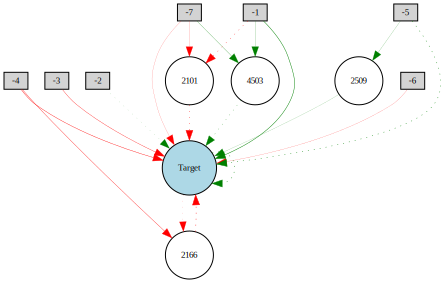

In [32]:
node_names = {-1: "-7", -2: "-6", -3: "-5", -4:"-4", -5:"-3", -6:"-2", -7:"-1",0: "Target"}
visualize.draw_net(config, winner, True, node_names=node_names)

In [6]:
import numpy as np
- np.sum(new_train_Y**2)/len(new_train_Y)

-0.1027440871826905

In [7]:
xor_outputs = [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]

In [32]:
xor_outputs == 0

False